Name: Ashmita Basnet ; Student Number: 2331185



# Worksheet 3: Modelling the Neuron
# Implementing MCP Neurons and Perceptron Learning Algorithm


Task - 1: Implementation of MCP Neurons:

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
## Task 1: MCP Neurons

# AND Function Implementation
def MCP_Neurons_AND(X1, X2, T):
    """

This functions implements basic AND operations with MCP Neuron for two inputs.
Arguments:
Inputs:
X1 (1 nd array): An array of binary values.
X2 (1 nd array): An array of binary values.
Output:
state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.

Implements the MCP Neuron for OR Boolean Function.
    """
    assert len(X1) == len(X2)
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        state_neuron.append(1 if (x1 + x2) >= T else 0)
    return state_neuron

In [7]:
# OR Function Implementation
def MCP_Neurons_OR(X1, X2, T):
    """
This function implements basic OR operations with MCP Neuron for two inputs.
Arguments:
Inputs:
X1 (1D array): An array of binary values.
X2 (1D array): An array of binary values.
Output:
state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.

Implements the MCP Neuron for OR Boolean Function.
    """
    assert len(X1) == len(X2)
    state_neuron = []
    for x1, x2 in zip(X1, X2):
        state_neuron.append(1 if (x1 + x2) >= T else 0)
    return state_neuron


In [8]:
# Sample Usage for AND Gate
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T_AND = 2
print("AND Output:", MCP_Neurons_AND(X1, X2, T_AND))

AND Output: [0, 0, 0, 1]


In [4]:
# Sample Usage for OR Gate
T_OR = 1
print("OR Output:", MCP_Neurons_OR(X1, X2, T_OR))

OR Output: [0, 1, 1, 1]


Answer the Following Question:

Question - 1: List out all the limitations of MCP - Neurons.
1. Cannot handle non-linearly separable data (e.g., XOR problem).
2. Has a hard threshold function, making learning difficult.
3. Cannot adapt or learn from data since weights are fixed.
4. Cannot generalize beyond basic logical operations.

In [ ]:
Task 2: Perceptron Algorithm for 0 vs 1 Classification

Step 1: Load the Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_0_1 = pd.read_csv("/content/drive/MyDrive/AI task/Copy of mnist_0_and_1.csv")
X = df_0_1.drop(columns=["label"]).values
y = df_0_1["label"].values

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Viewing the Dataset

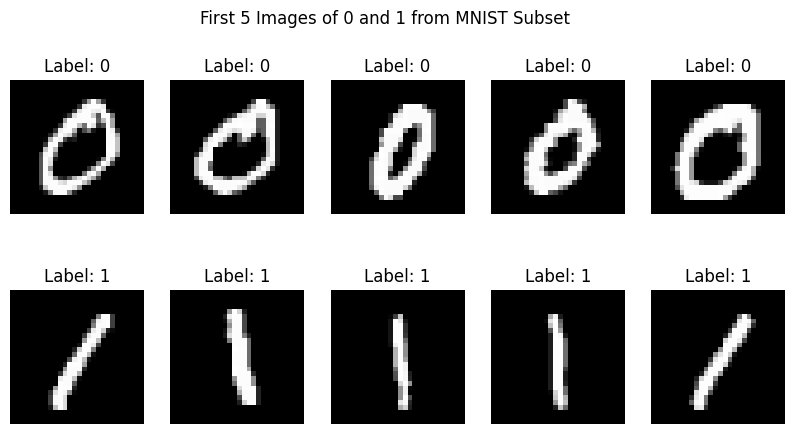

In [10]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

Step - 2 - Initializing the Weights:

In [11]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Step - 3 - Make a Decision function:

In [12]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias  # Compute weighted sum
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Apply step function

    return y_pred_all


Step - 3 - Implement the Perceptron Learning Algorithm

In [13]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final accuracy of the perceptron.
    """
    for epoch in range(epochs):  # Iterate over epochs
        correct_predictions = 0  # Track correct classifications

        for i in range(len(X)):  # Iterate through each sample
            prediction = np.dot(X[i], weights) + bias  # Compute weighted sum
            y_pred = 1 if prediction >= 0 else 0  # Apply step function

            if y_pred == y[i]:
                correct_predictions += 1  # Count correct predictions
            else:
                # Update weights and bias if the prediction is wrong
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)

        # Calculate accuracy after each epoch
        accuracy = correct_predictions / len(y)

        # Early stopping if perceptron converges (all correct predictions)
        if accuracy == 1.0:
            break

    return weights, bias, accuracy


Training the Perceptron

In [14]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


Step 5: Visualize Misclassified Images

In [15]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


# Task 3: Perceptron Algorithm for 3 vs 5 Classification

1. Load the Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset for digits 3 and 5
df_3_5 = pd.read_csv("/content/drive/MyDrive/AI task/Copy of mnist_3_and_5.csv")

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixel values
y = df_3_5["label"].values  # Labels (3 or 5)

# Convert labels to binary (Perceptron requires 0/1)
y = np.where(y == 3, 0, 1)

print("Dataset Shape:", X.shape)
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Dataset Shape: (2741, 784)
Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


2. Visualize Some Digits

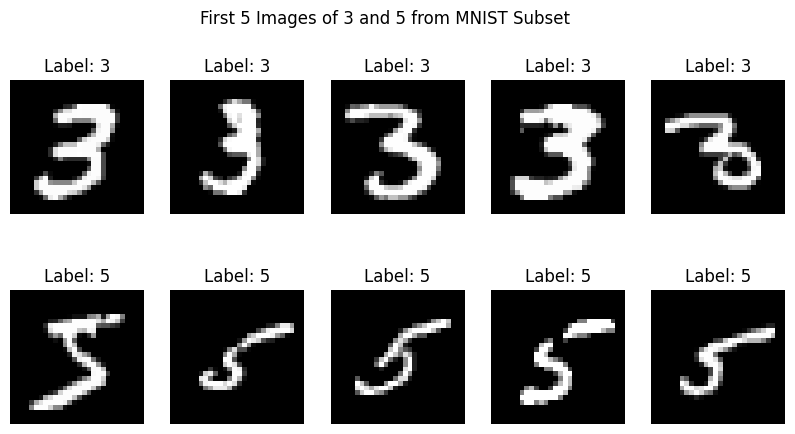

In [18]:
# Separate images for label 3 and label 5
images_3 = X[y == 0]  # Get all images labeled as 3
images_5 = X[y == 1]  # Get all images labeled as 5

# Plot first 5 images from each class
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in range(5):
    axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 3")
    axes[0, i].axis("off")

    axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 5")
    axes[1, i].axis("off")

plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
plt.show()


3. Initialize Weights and Bias

In [19]:
weights = np.zeros(X.shape[1])  # Initialize weights (one per pixel)
bias = 0
learning_rate = 0.1
epochs = 100


: **Implement the Decision**

In [20]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training
    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    # Step function: returns 1 if predictions >= 0 else 0
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all


**Implement the Perceptron Learning Algorithm**

In [22]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.
    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)
    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions.
    """
    for epoch in range(epochs):
        for i in range(len(X)):
            output = np.dot(X[i], weights) + bias
            prediction = 1 if output >= 0 else 0

            # Update weights and bias if prediction is incorrect
            if prediction != y[i]:
                weights += learning_rate * (y[i] - prediction) * X[i]
                bias += learning_rate * (y[i] - prediction)

    # Calculate accuracy
    y_pred = decision_function(X, weights, bias)
    accuracy = np.mean(y_pred == y)

    return weights, bias, accuracy


**Visualizing misclassified image**


Final Accuracy: 0.4586


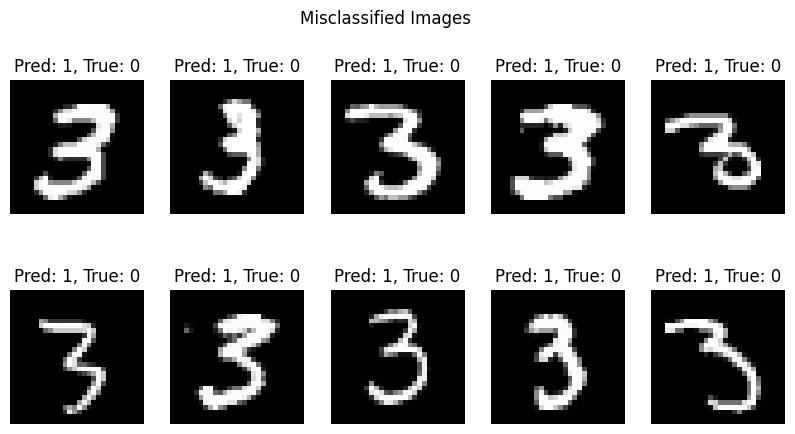

In [23]:
import matplotlib.pyplot as plt

# Get predictions for all data points
y_pred = decision_function(X, weights, bias)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")
